# UBER Supply-Demand Gap

## Problem Statement

You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?

Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. Let’s hear more about such problems that Uber faces during its operations.

 

## Business Objectives

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them. 

## Data Understanding

There are six attributes associated with each request made by a customer:

- Request id: A unique identifier of the request
- Time of request: The date and time at which the customer made the trip request
- Drop-off time: The drop-off date and time, in case the trip was completed 
- Pick-up point: The point from which the request was made
- Driver id: The unique identification number of the driver
- Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available


In [28]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [29]:
#loading data into dataframe
df = pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [30]:
#checking the number of duplicate rows are zero
df.duplicated().sum()

0

In [31]:
#lets look at the dimensions of the dataframe
df.shape

(6745, 6)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### check for NA values in dataset



In [33]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [34]:
df.isnull().values.any()

True

In [35]:
df.isnull().values.sum()

6564


#### Check the % of NA's columnwise

In [36]:
print((df.isnull().sum()*100)/df.shape[0])

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


#### converting "Request timestamp"/"Drop timestamp" column to datetime object

In [38]:
#Formatting request timestamp column
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


In [39]:
#Formatting drop timestamp column
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [40]:
#cross checking data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [41]:
#Extracting hour from the request timestamp for further analysis 
df["Request Date"] = df["Request timestamp"].dt.date
df["Request time"] = df["Request timestamp"].dt.time
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16


In [42]:
#Extracting day from the  request timestamp for further analysis 
df["Request Day"] = df["Request timestamp"].dt.day
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Request Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13


In [43]:
#Extracting hour from the  request timestamp for further analysis
df["Request Hour"] = df["Request timestamp"].apply(lambda x:x.hour)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Request Day,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,8


In [60]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

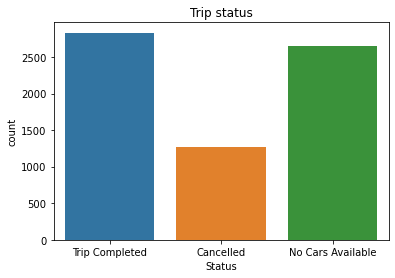

In [44]:
#Plotting graph for trip status
sns.countplot(df["Status"])
plt.title("Trip status")
plt.show()

#### Calculating Demand- supply gap 

In [50]:
df_demand = df['Status']
df_demand.shape

(6745,)

In [55]:
df_supply = df[(df['Status']=='Trip Completed')]
df_supply.shape

(2831, 10)

In [61]:
df_gap = df[(df['Status']=='No Cars Available')|(df['Status']=='Cancelled')]
df_gap.shape

(3914, 10)

#### As we can see from the graph, not even 50% of total demand was met and there is more 50% of gap of supply due to No cars available and cancellation of trip.

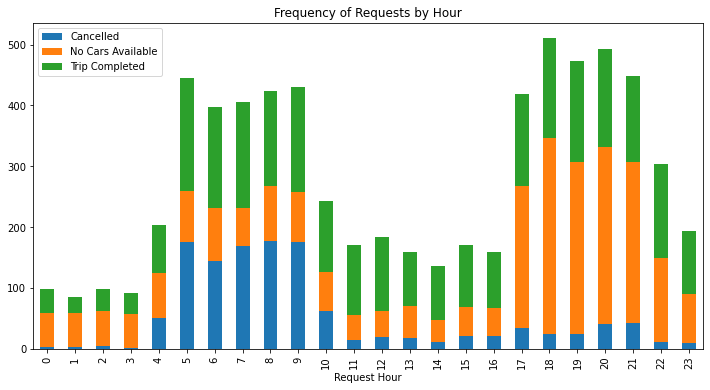

In [96]:
#Frequency of Request by Hour
df.groupby(['Request Hour','Status']).size().unstack().plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Frequency of Requests by Hour')
plt.legend()
plt.show()

#### As we can see from above graph each hour the trip completed is in high number although there is high demand, but car availability is also main problem here.

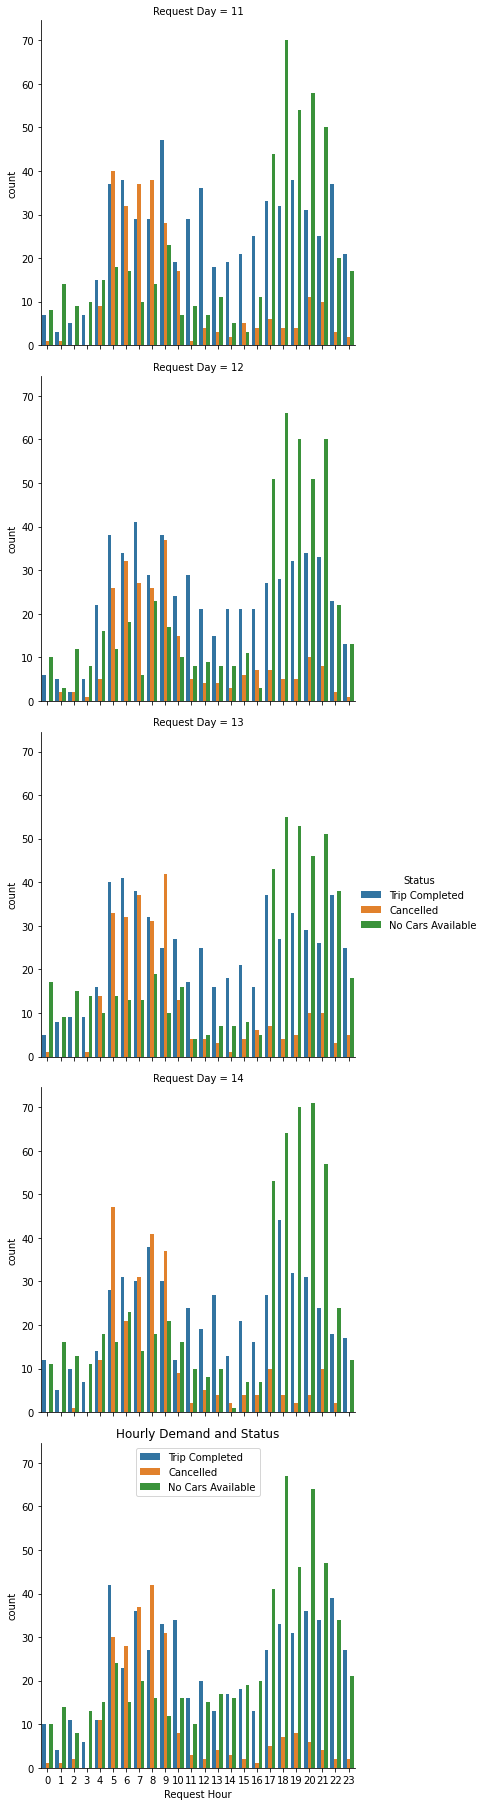

In [65]:
#factor plot of hour and day with respect to status to visualize peak hours 
sns.factorplot(x='Request Hour',hue = 'Status', row = 'Request Day', data = df, kind = 'count')
plt.legend()
plt.title('Hourly Demand and Status')
plt.show()

##### As we can see here there is a high demand in morning and evening. Also we can see No cars available is in huge number for that we can hire part time drivers at that time so that we assure that we can fullfill that demand.




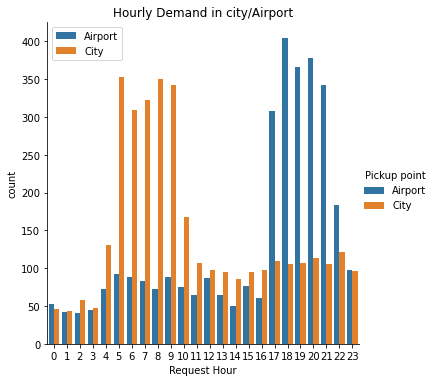

In [66]:
#factor plot of for all days with respect to Pick-up points
sns.factorplot(x='Request Hour',hue = 'Pickup point', data = df, kind = 'count')
plt.legend()
plt.title('Hourly Demand in city/Airport')
plt.show()


#### As we can clearly see that in morning hour there are larger pick-up from the City as compare to the Airport and in the evening hour there are large pick-up from Airports


In [67]:
#Creating a time slot for various time period of day so that we can get meaningfull insight
def time_period(x):
    if x<5:
        return "Pre Morning"
    elif x>=5 and x<10:
        return "Morning Rush"
    elif x>=10 and x<17:
        return "Day Time"
    elif x>=17 and x<22:
        return "Evening Rush"
    else:
        return "Late Night"
    


In [68]:
df['Time Slot'] = df['Request Hour'].apply(lambda x:time_period(x))
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Request Day,Request Hour,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,17,Evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,9,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,21,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,8,Morning Rush


#### Now we have time period as time slot, from this we can easly get an idea which is the peak hour, when the trip is complited more, which time the availability of car is less  etc

In [69]:
df["Time Slot"].value_counts()

Evening Rush    2342
Morning Rush    2103
Day Time        1224
Pre Morning      578
Late Night       498
Name: Time Slot, dtype: int64

#### As we clearly see from above info that maximum number of travellers are between Evening Rush and Morning Rush time

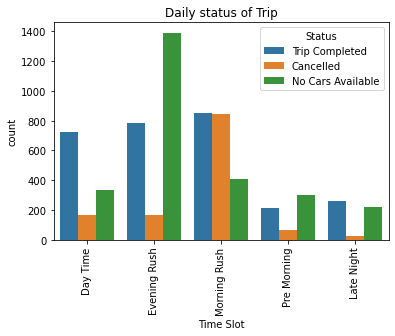

In [70]:
#Ploting  time slot with respect to status and identify the most critical problems before UBER
sns.countplot(x='Time Slot', hue = 'Status',data = df)
plt.title('Daily status of Trip')
plt.xticks(rotation=90)
plt.show()

#### From the above graph we can clearly notice that in Rush hour like availability of cars are very less or decent, and trip completed in Evening Rush time is decent and Average in Morning Rush time, but in morning Rush hour cancellation is main problem.
#### --- Evening Rush hour cars availability is main problem
#### --- Morning Rush hour Trip cancellation is main problem
#### --- In other time of day everything are decent in number 

#### As we can see in Morning Rush time slot there are highest number of cancellation 
#### Now lets devide our analysis with respect to City vs Airport


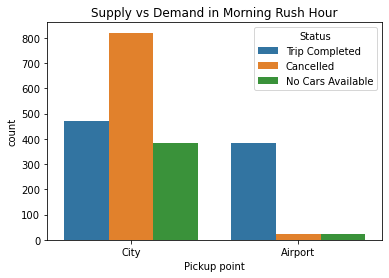

In [71]:
#Ploting count plot of Morning Rush timeslot with respect to pick-up place
df_Morning_Rush = df[(df['Time Slot']=='Morning Rush')]
sns.countplot(x="Pickup point", hue='Status',data= df_Morning_Rush)
plt.title('Supply vs Demand in Morning Rush Hour')
plt.show()

#### As we can see here in city in Morning Rush hours trip cancellation is the majior problem

#### severity of the problem by location & their count (cacellation of cab as per the pickup location in Morning Rush hours)

In [72]:
#count of cancelled trip by location(Airport)
df_ap_cancel = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="Airport")&(df_Morning_Rush['Status']=="Cancelled")]
len(df_ap_cancel.index)

23

In [73]:
#count of cancelled trip by location(city)
df_city_cancel = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="City")&(df_Morning_Rush['Status']=="Cancelled")]
len(df_city_cancel.index)

820

#### From the counts we can clearly notice that in city there is major problem in cacellation so we can proced our analysis towards that particular problem for now.

In [74]:
#now lets look at the supply and demand in Morning Rush hour in city
#checking supply in Morning Rush Hour
df_city_supply = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="City")&(df_Morning_Rush['Status']=="Trip Completed")]
len(df_city_supply.index)

472

In [75]:
#checking Demand in Morning Rush Hour
df_city_demand = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="City")]
len(df_city_demand.index)

1677

#### As we can see from supply and Demand counts, the supply for the demand is very very less



####  Now lets see what is gap between supply and demand in Airport

In [76]:
#lets look at supply and demand in Morning Rush hour in Airport
#checking supply in Morning Rush Hour
df_ap_supply = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="Airport")&(df_Morning_Rush['Status']=="Trip Completed")]
len(df_ap_supply.index)

382

In [77]:
#checking Demand in Morning Rush Hour
df_ap_demand = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="Airport")]
len(df_ap_demand.index)

426

#### In Morning Rush hour in Airport supply is very good that we see from the above counts 


#### Now let's look at the supply and demand in Evening rush in the city to get the more insight at  that time slot 


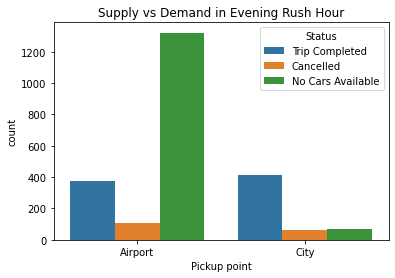

In [78]:
#supply vs demand in Evening Rush hours 
#Ploting count plot of Evening Rush timeslot with respect to pick-up place
df_Eve_Rush = df[(df['Time Slot']=='Evening Rush')]
sns.countplot(x="Pickup point", hue='Status',data= df_Eve_Rush)
plt.title('Supply vs Demand in Evening Rush Hour')
plt.show()

#### As we can see from above graph there is huge demand in Airport in Evening Rush hour but there is problem with availability of cars by that time, but in city supply is good.


In [79]:
#now lets look at supply and demand in evening rush in the city 
df_City_supply = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="City")&(df_Eve_Rush['Status']=="Trip Completed")]
len(df_city_supply.index)

472

In [80]:
#demand in evening rush hours 
df_City_demand = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="City")]
len(df_city_demand.index)

1677

#### As we clearly see from above graph and counts in city in evening rush hour there is good supply.

In [82]:
#lets check at the supply and demand in airport in evening rush hours
df_AP_supply = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="Airport")&(df_Eve_Rush['Status']=="Trip Completed")]
len(df_AP_supply.index)

373

In [83]:
#demand in evening rush hours 
df_AP_demand = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="Airport")]
len(df_AP_demand.index)

1800

#### here we see there is huge gap between demand and supply in evening hours in airport location 



In [84]:
#lets look at severity problem (of demand and supply)at  each location by looking at cacellation in evening rush
df_AP_cancel = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="Airport")&(df_Eve_Rush['Status']=="Cancelled")]
len(df_AP_cancel.index)

106

In [85]:
#count of cancelled trip by location(city)
df_City_cancel = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="City")&(df_Eve_Rush['Status']=="Cancelled")]
len(df_City_cancel.index)

60

#### There not much trips has been cancelled by driver in both location 

####  now let us understand severity of problem by location in Morning Rush as per no cars availability 
##### Till now we have seen insights on cancelled trips but now lest get insight from no cars availability 

In [86]:
#count of trip with unavailability of car by location(Airport)
df_AP_ncars = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="Airport")&(df_Morning_Rush['Status']=="No Cars Available")]
len(df_AP_ncars.index)

21

In [87]:
#count of trip with unavailability of car by location(city)
df_City_ncars = df_Morning_Rush[(df_Morning_Rush['Pickup point']=="City")&(df_Morning_Rush['Status']=="No Cars Available")]
len(df_City_ncars.index)

385

#### From the graph and numbers above we can say that in city in morning rush hour there is availability of more cars will almost help us to reach the supply as per demand.

In [88]:
#severity of problem by location in evening rush (Unavailability of car)
#count of trip with unavailability of car by location(Airport)
df_AP_ncars = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="Airport")&(df_Eve_Rush['Status']=="No Cars Available")]
len(df_AP_ncars.index)

1321

In [89]:
#count of trip with unavailability of car by location(city)
df_City_ncars = df_Eve_Rush[(df_Eve_Rush['Pickup point']=="City")&(df_Eve_Rush['Status']=="No Cars Available")]
len(df_City_ncars.index)

71

#### From the above counts we can see that in evening rush hours there is very less available cars are ther in airport to fullfill demand 

In [90]:
####  Lets check the status of trip in Morning Rush hour where pick up point is city.

In [91]:
def pie_chart(dataframe):
    labels = dataframe.index.values
    sizes = dataframe.Status.values
    fig1,ax1 = plt.subplots()
    ax1.pie(sizes,labels=dataframe.index.values)
    plt.legend()
    ax1.set_title('Morning Rush Status of trip in City')
    ax1.axis('equal')
    plt.show()

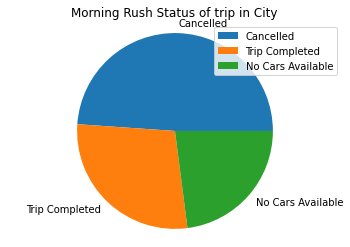

In [92]:
df_city = df[(df['Pickup point']=='City')&(df['Time Slot']=='Morning Rush')]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

####  Lets check the status of trip in Evening Rush hour where pick up point is Airpot.

In [93]:
def Pie_chart(dataframe):
    labels = dataframe.index.values
    sizes = dataframe.Status.values
    fig1,ax1 = plt.subplots()
    ax1.pie(sizes,labels=dataframe.index.values)
    plt.legend()
    ax1.set_title('Evening Rush Status of trip in Airport')
    ax1.axis('equal')
    plt.show()

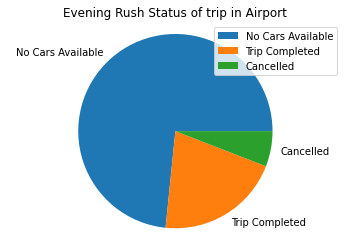

In [94]:
df_ap = df[(df['Pickup point']=='Airport')&(df['Time Slot']=='Evening Rush')]
df_ap_count = pd.DataFrame(df_ap.Status.value_counts())
Pie_chart(df_ap_count)